CUSTOMER CHURN -PREDICTION

Develop a model to predict customer churn for a subscriptionbased service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.

Dataset loaded successfully with shape: (10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57 

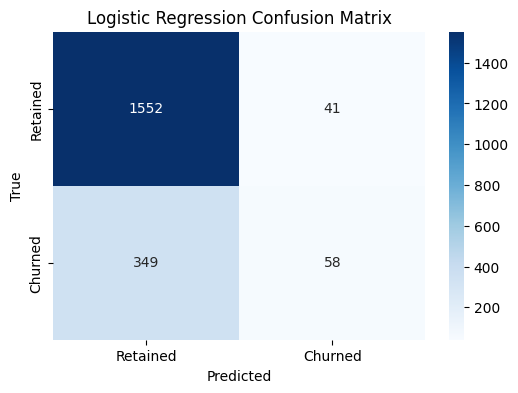


Random Forest Performance:
Accuracy: 0.864
ROC-AUC Score: 0.712493695544543
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



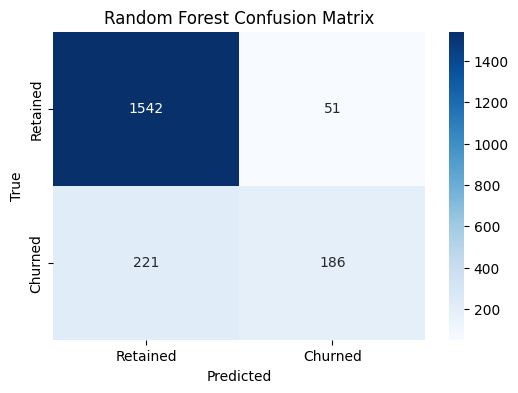


Gradient Boosting Performance:
Accuracy: 0.8675
ROC-AUC Score: 0.7220078321773237
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.48      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



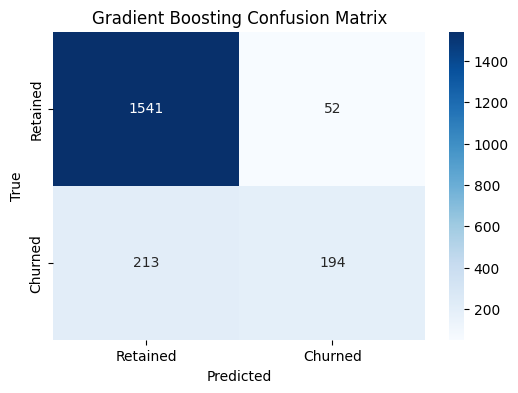


Top 10 Important Features:
           Feature  Importance
3              Age    0.239934
9  EstimatedSalary    0.147069
0      CreditScore    0.144104
5          Balance    0.141194
6    NumOfProducts    0.129134
4           Tenure    0.081958
8   IsActiveMember    0.039596
1        Geography    0.038467
7        HasCrCard    0.019583
2           Gender    0.018959


<ipython-input-1-aed75329fbc4>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


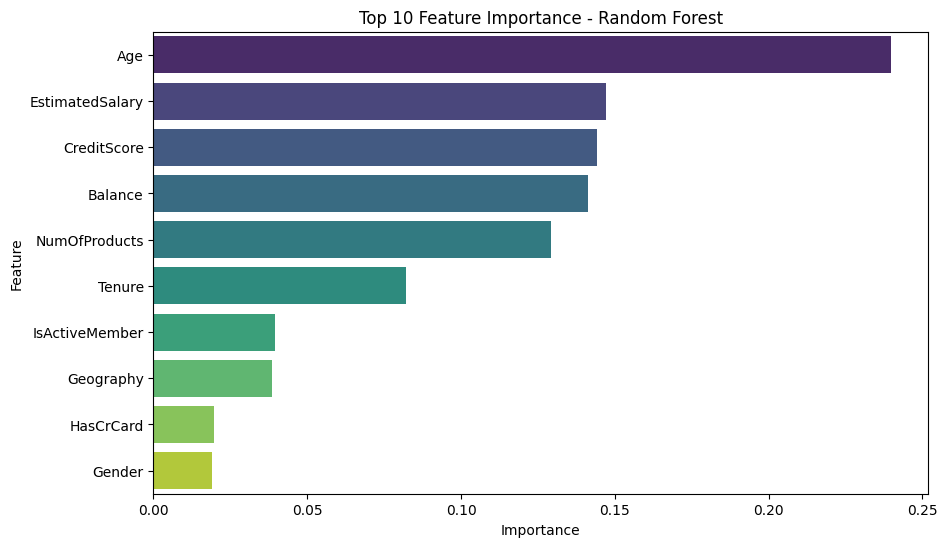

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Load the Dataset

# Define the dataset path
dataset_path = "/content/Churn_Modelling.csv"

# Load the dataset
df = pd.read_csv(dataset_path)
print("Dataset loaded successfully with shape:", df.shape)

# Preview the dataset
print(df.head())


# Step 2: Data Preprocessing

# Drop unnecessary columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Encode categorical variables
le_gender = LabelEncoder()
le_geography = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Geography'] = le_geography.fit_transform(df['Geography'])

# Separate features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 3: Split the Dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")


# Step 4: Train Models

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)


# Step 5: Evaluate Models

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Evaluate each model
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Gradient Boosting", y_test, gb_pred)


# Step 6: Feature Importance (for Random Forest)

feature_importance = pd.DataFrame({
    'Feature': df.drop('Exited', axis=1).columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title("Top 10 Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
